<a href="https://colab.research.google.com/github/jtao22/PHYS-XR050/blob/main/ec/ec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from matplotlib import cm

#Import files 

In [ ]:
from google.colab import files 
files.upload()

In [58]:
data = pd.read_csv('iris.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [60]:
data.shape

(150, 5)

In [61]:
for i in range(0,150):
  if (data['species'][i] == 'Iris-setosa'):
    data['species'][i] = 0
  elif (data['species'][i] == 'Iris-versicolor'):
    data['species'][i] = 1
  else:
    data['species'][i] = 2
data['species'] = data['species'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [62]:
data['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [63]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [64]:
corr = data.corr(method='pearson')
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


#Heatmap

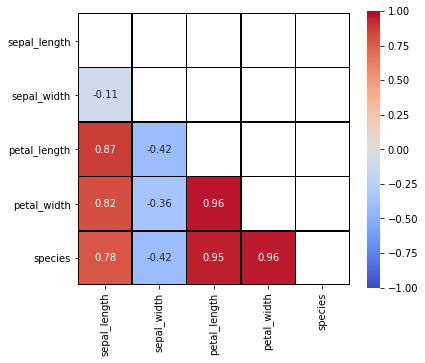

In [65]:
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(6,6))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.coolwarm,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [66]:
length = pd.DataFrame(data, columns = ['petal_length', 'species'])
for i in range(0,150):
  if (data['species'][i] == 2):
    length['species'][i] = 1
  else:
    length['species'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
length['species'].value_counts()

0    100
1     50
Name: species, dtype: int64

#Graphing

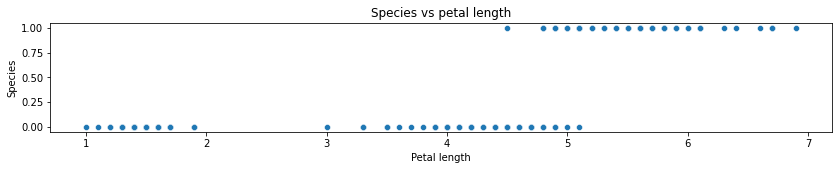

In [68]:
#graph actual vs predicted 
fig = plt.figure(figsize=(14,2))
plot = fig.add_subplot(1,1,1)
sns.scatterplot(x=length['petal_length'],y=length['species'],ax=plot)
plot.set_xlabel('Petal length')
plot.set_ylabel('Species')
plot.set_title('Species vs petal length')
fig.show()

In [69]:
length['logs'] = np.log(length['species']/(1-length['species']))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
length.tail(5)

,petal_length,species,logs
145,5.2,1,inf
146,5.0,1,inf
147,5.2,1,inf
148,5.4,1,inf
149,5.1,1,inf


#Logistic Regression

In [72]:
def lnlike(theta,x,y):
  m,b = theta
  logodds = m*x+b
  prob = logodds
  for i in range(0,logodds.size):
    prob[i] = 1/(1+math.exp(-logodds[i]))
  ans = (y*np.log(prob)+(1-y)*np.log(1-prob)).sum()
  return ans
import scipy.optimize as op
def nll(*args):
 return -lnlike(*args)
result = op.minimize(nll, [0.0, 1.0], args=(length['petal_length'], length['species']))
m_ml, b_ml = result["x"]
print(m_ml,b_ml) 

9.001983579083978 -43.78082859893788


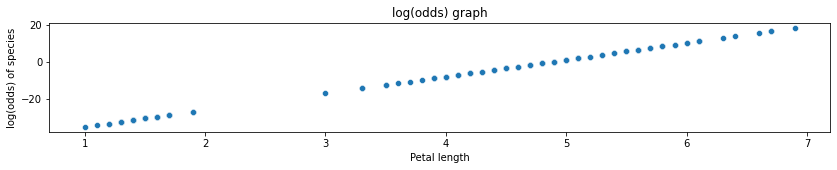

In [73]:
fig = plt.figure(figsize=(14,2))
plot = fig.add_subplot(1,1,1)
#sns.scatterplot(x=length['petal_length'],y=length['species'],ax=plot)
sns.scatterplot(x=length['petal_length'],y=m_ml*length['petal_length']+b_ml,ax=plot)
plot.set_xlabel('Petal length')
plot.set_ylabel('log(odds) of species')
plot.set_title('log(odds) graph')
fig.show()

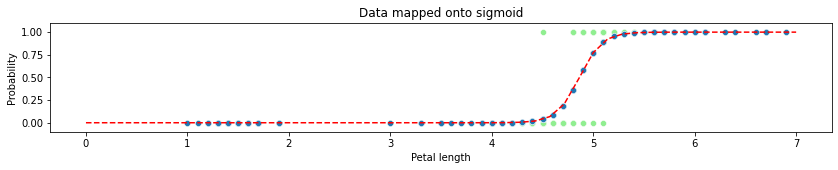

In [93]:
fig = plt.figure(figsize=(14,2))
plot = fig.add_subplot(1,1,1)
#sns.scatterplot(x=length['petal_length'],y=length['species'],ax=plot)
modelx = np.linspace(0,7)
sns.scatterplot(x=length['petal_length'],y=length['species'],ax=plot,color='lightgreen')
sns.scatterplot(x=length['petal_length'],y=1/(1+np.exp(-m_ml*length['petal_length']-b_ml)),ax=plot)
sns.lineplot(x=modelx,y=1/(1+np.exp(-m_ml*modelx-b_ml)),ax=plot,color='red')
plot.lines[0].set_linestyle("--")
plot.set_ylim(-0.1,1.1)
plot.set_xlabel('Petal length')
plot.set_ylabel('Probability')
plot.set_title('Data mapped onto sigmoid')
fig.show()

In [96]:
like = 1/(1+np.exp(-m_ml*length['petal_length']-b_ml))
min = 0.5
saveindex = 0
for i in range(0,150):
    if (like[i] >= 0.5 and like[i]-0.5 <= min):
      min = like[i]-0.5
      saveindex = i
print("50% Decision Boundary:",length['petal_length'][saveindex])

50% Decision Boundary: 4.9


#Calculate R^2

In [97]:
ocount = 0
fcount = 0
like = 1/(1+np.exp(-m_ml*length['petal_length']-b_ml))
for i in range(0,150):
  if (length['species'][i] == 1):
    ocount = ocount + 1
  if (like[i] >= 0.5):
    fcount = fcount+1
op = ocount/150
fp = fcount/150
llo = (length['species']*np.log(op)+(1-length['species']*np.log(1-op))).sum() 
llf = (like*np.log(op)+(1-like*np.log(1-op))).sum()
r2 = (llo-llf)/llo
print(r2)

2.5469171716469995e-09
